In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

import pandas as pd
import numpy as np

## 1) 체육시설 창/폐업 수

In [2]:
df1 = pd.read_csv('data/인허가/골프연습장.csv', encoding='cp949')
df1 = df1.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df2 = pd.read_csv('data/인허가/골프장.csv', encoding='cp949')
df2 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df3 = pd.read_csv('data/인허가/당구장업.csv', encoding='cp949')
df3 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df4 = pd.read_csv('data/인허가/등록체육시설업.csv', encoding='cp949')
df4 = df4.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df5 = pd.read_csv('data/인허가/무도장업.csv', encoding='cp949')
df5 = df5.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df6 = pd.read_csv('data/인허가/무도학원업.csv', encoding='cp949')
df6 = df6.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df7 = pd.read_csv('data/인허가/빙상장업.csv', encoding='cp949')
df7 = df7.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df8 = pd.read_csv('data/인허가/수영장업.csv', encoding='cp949')
df8 = df8.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df9 = pd.read_csv('data/인허가/스키장.csv', encoding='cp949')
df9 = df9.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df10 = pd.read_csv('data/인허가/승마장업.csv', encoding='cp949')
df10 = df10.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df11 = pd.read_csv('data/인허가/썰매장업.csv', encoding='cp949')
df11 = df11.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df12 = pd.read_csv('data/인허가/요트장업.csv', encoding='cp949')
df12 = df12.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df13 = pd.read_csv('data/인허가/종합체육시설업.csv', encoding='cp949')
df13 = df13.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df14 = pd.read_csv('data/인허가/체력단련장업.csv', encoding='cp949')
df14 = df14.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df15 = pd.read_csv('data/인허가/체육도장업.csv', encoding='cp949')
df15 = df15.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,20,25,26,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])
df

,개방서비스명,인허가일자,폐업일자,좌표정보(x),좌표정보(y)
0,골프연습장업,20040309,NaN,212562.6164,443174.220700
1,골프연습장업,20070508,NaN,176660.864,448048.231900
2,골프연습장업,20021025,NaN,174426.8522,447457.664500
3,골프연습장업,20001201,NaN,244015.8142,348104.593800
4,골프연습장업,20010928,NaN,245051.8092,345435.361700
...,...,...,...,...,...
17629,체력단련장업,20100125,NaN,218027,448919.023505
17630,체력단련장업,20081104,NaN,190251,453017.867203
17631,체력단련장업,20170504,NaN,203899,443655.849953
17632,체력단련장업,20090224,NaN,207531,184572.389317


In [4]:
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')

In [5]:
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

In [6]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

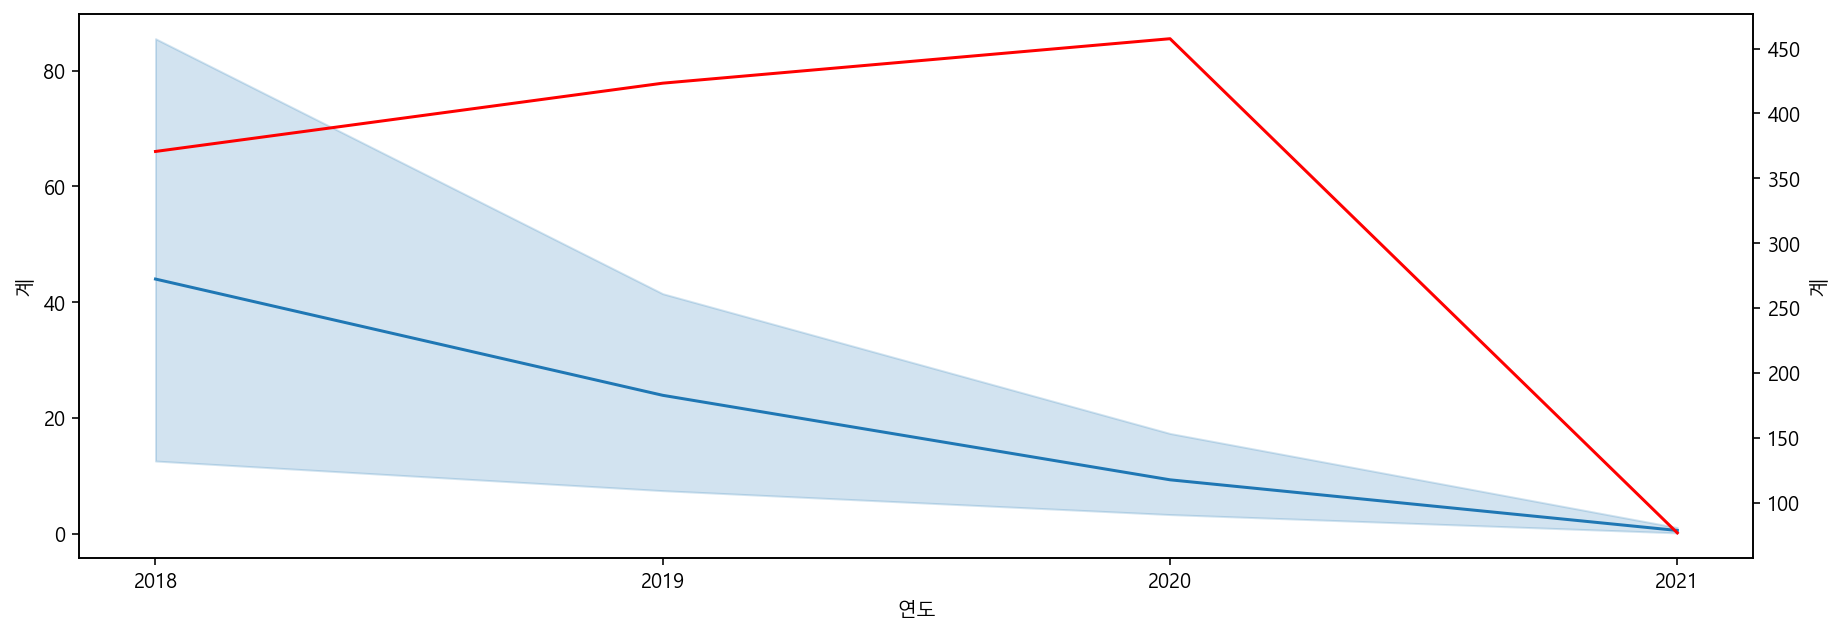

In [7]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1 = sns.lineplot(x='연도', y='계', data=df_open, ax=ax1)
ax2 = sns.lineplot(x='연도', y='계', data=df_close, ax=ax2, ci=None, color='red')
ax1.set_xticks([2018,2019,2020,2021])

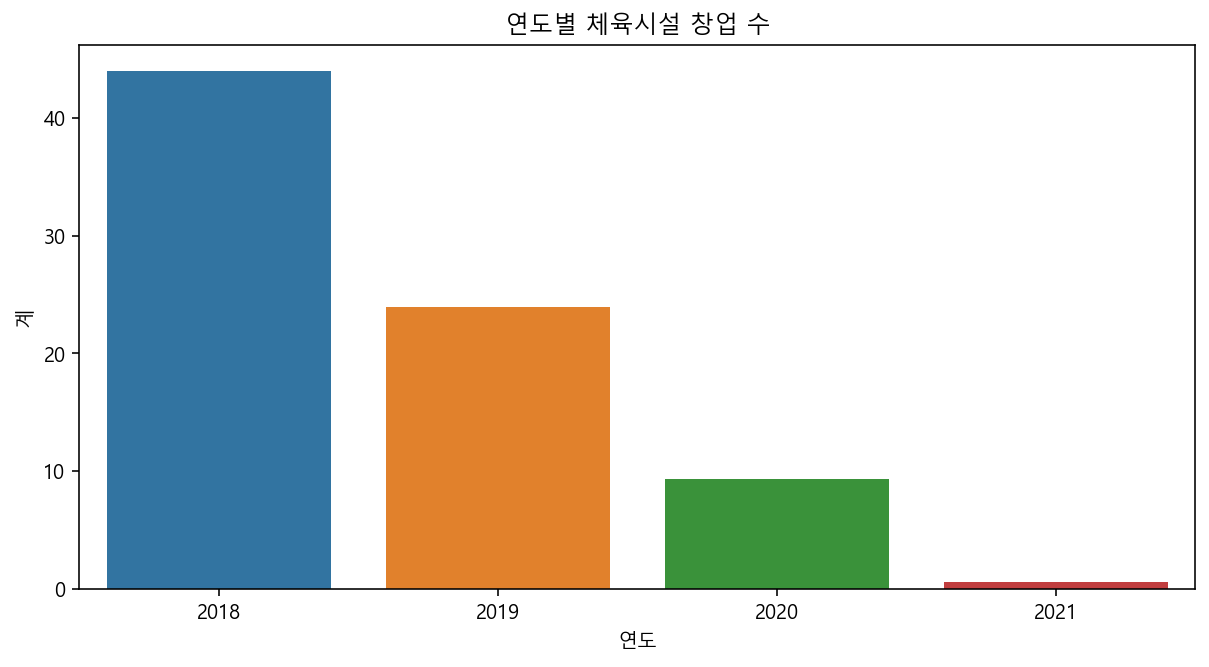

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 체육시설 창업 수')
plt.savefig('data2/연도별_체육시설_창업수.jpg')

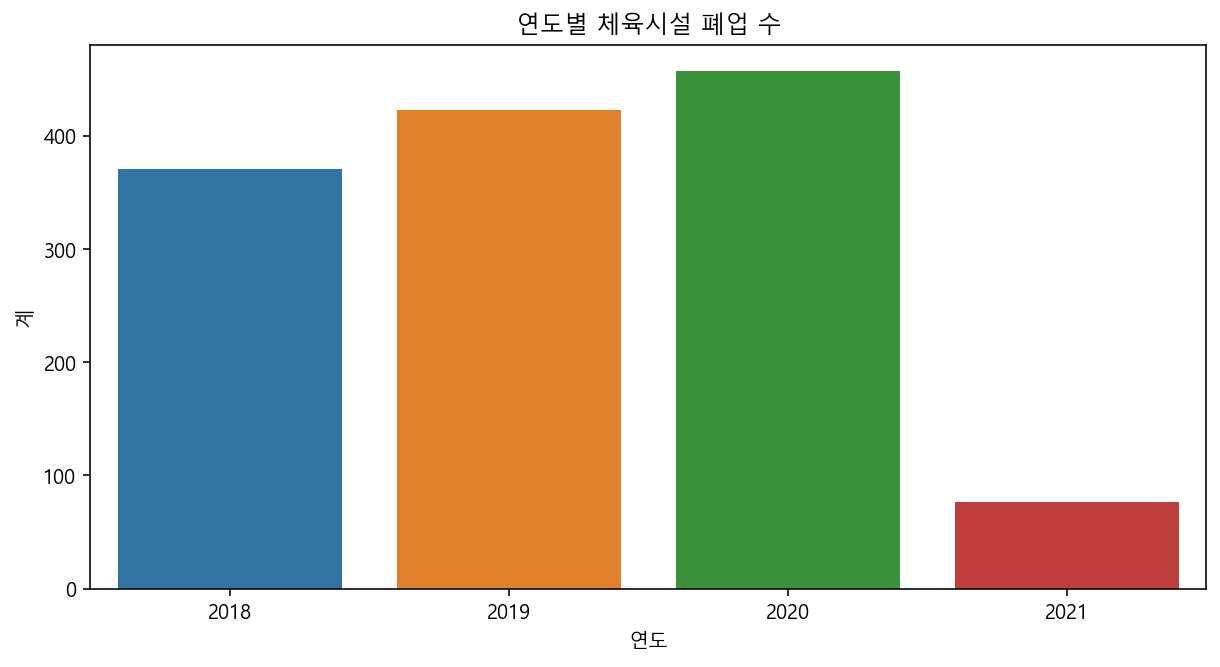

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 체육시설 폐업 수')
plt.savefig('data2/연도별_체육시설_폐업수.jpg')

<AxesSubplot:xlabel='구분', ylabel='계'>

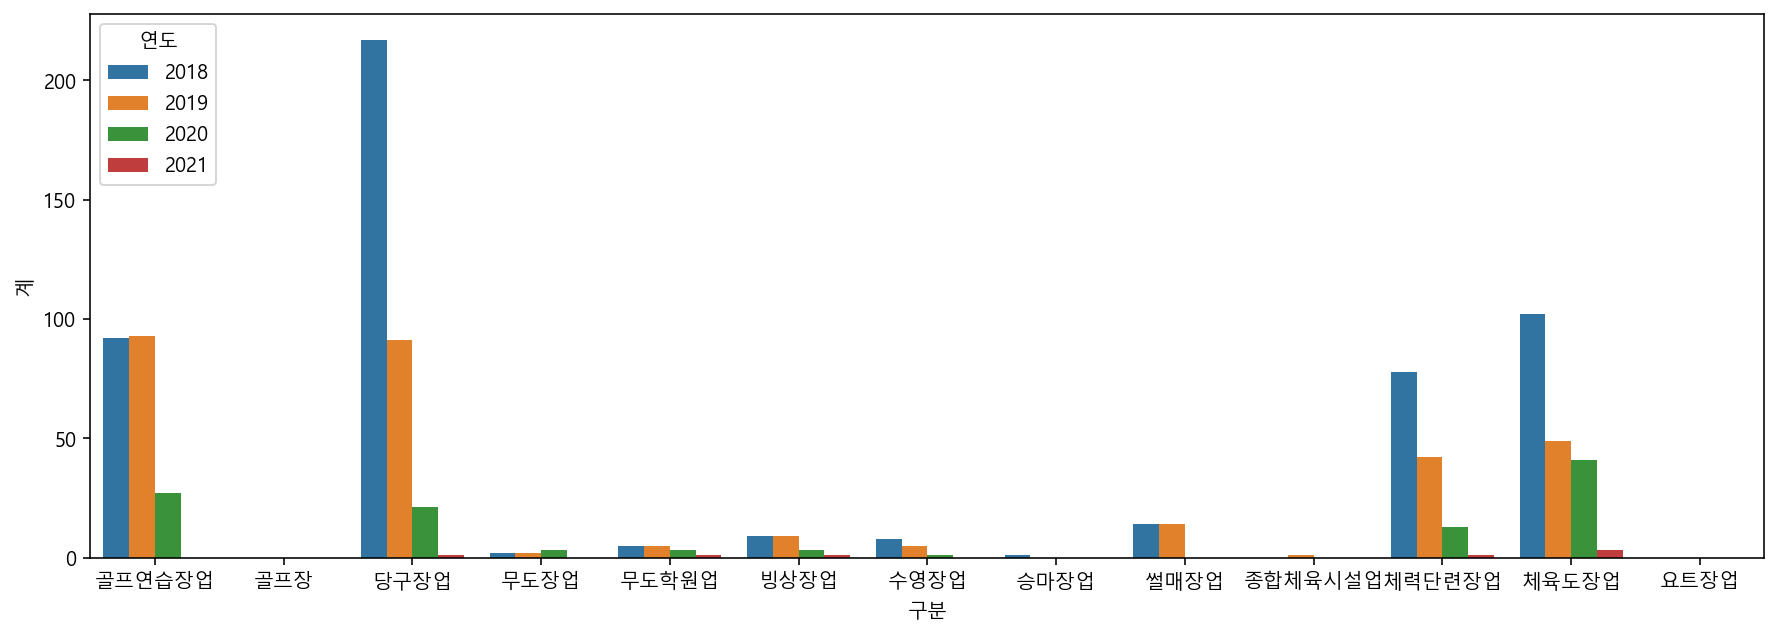

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='구분', y='계', hue='연도', data=df_open, ci=None)

<AxesSubplot:xlabel='구분', ylabel='계'>

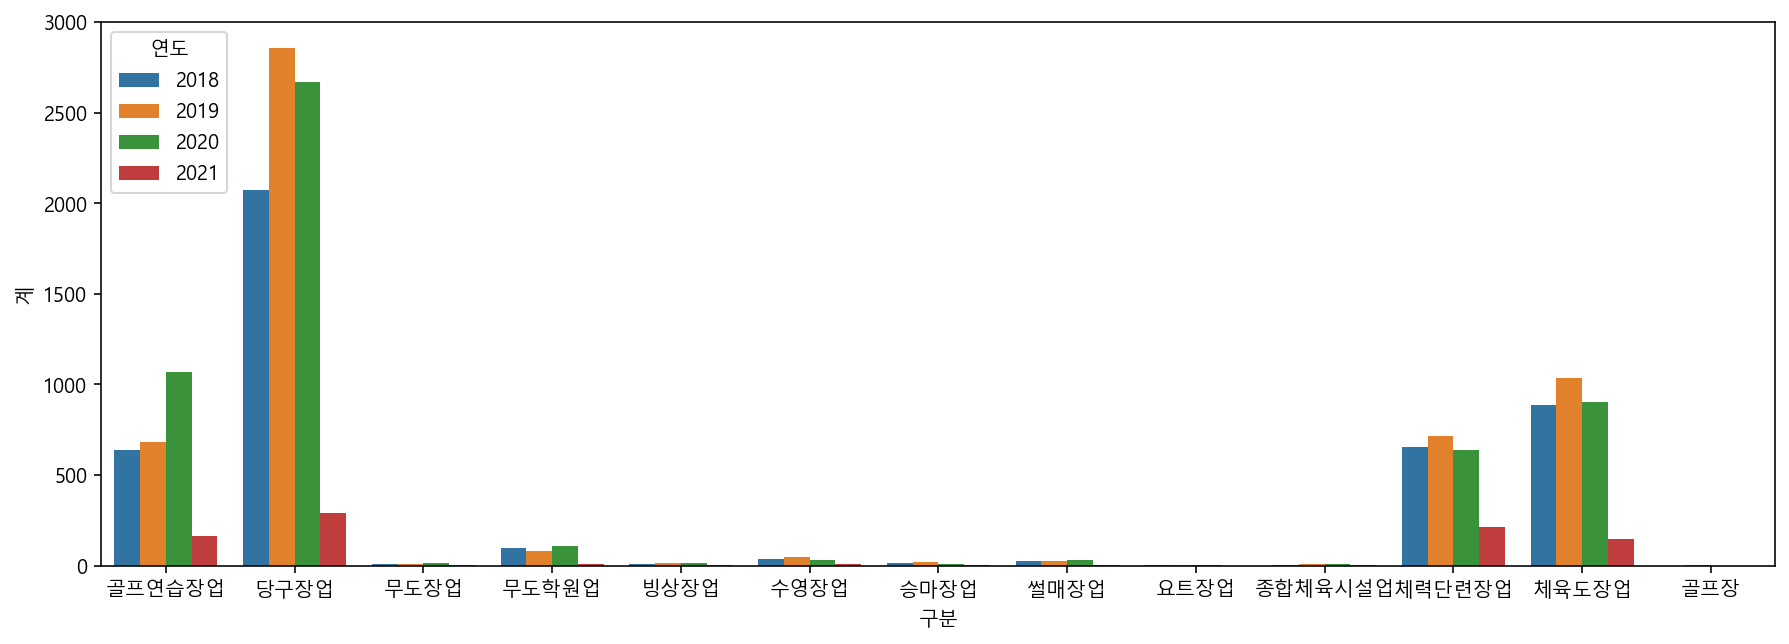

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='구분', y='계', hue='연도', data=df_close, ci=None)

- 연도별 창업 체육시설 수

<AxesSubplot:xlabel='연도'>

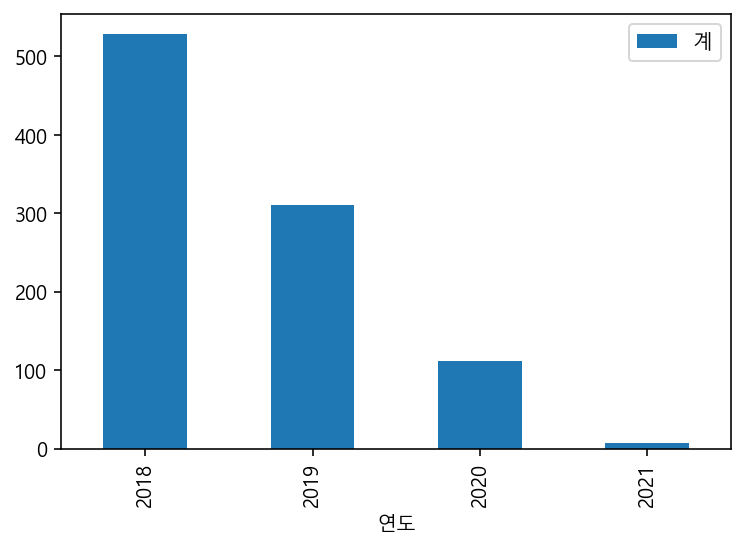

In [294]:
df_open.groupby('연도').sum().plot(kind='bar')

- 연도별 폐업 체육시설 수

<AxesSubplot:xlabel='연도'>

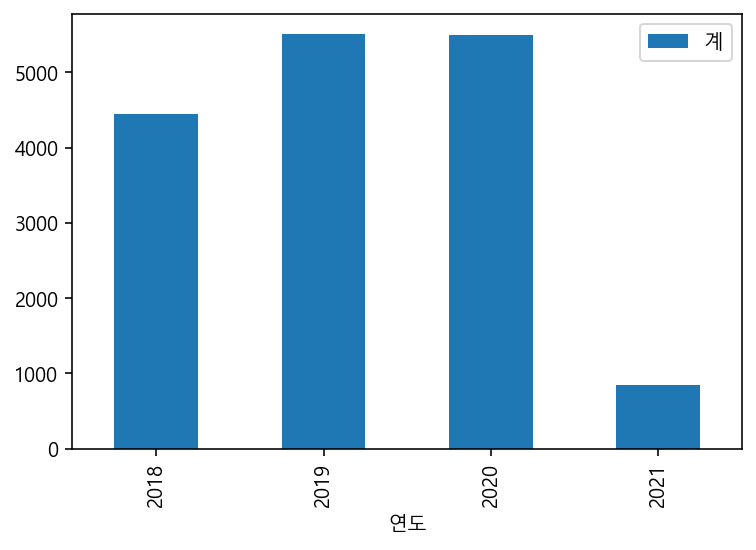

In [115]:
df_close.groupby('연도').sum().plot(kind='bar')

## 2) 관광시설 창/폐업 수

In [144]:
df1 = pd.read_csv('data/인허가/fulldata_03_12_01_P_국내여행업.csv', encoding='cp949')
df1 = df1.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df2 = pd.read_csv('data/인허가/fulldata_03_12_02_P_국외여행업.csv', encoding='cp949')
df2 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df3 = pd.read_csv('data/인허가/fulldata_03_12_03_P_일반여행업.csv', encoding='cp949')
df3 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [145]:
df = pd.concat([df1, df2, df3])
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')

In [146]:
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

In [147]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

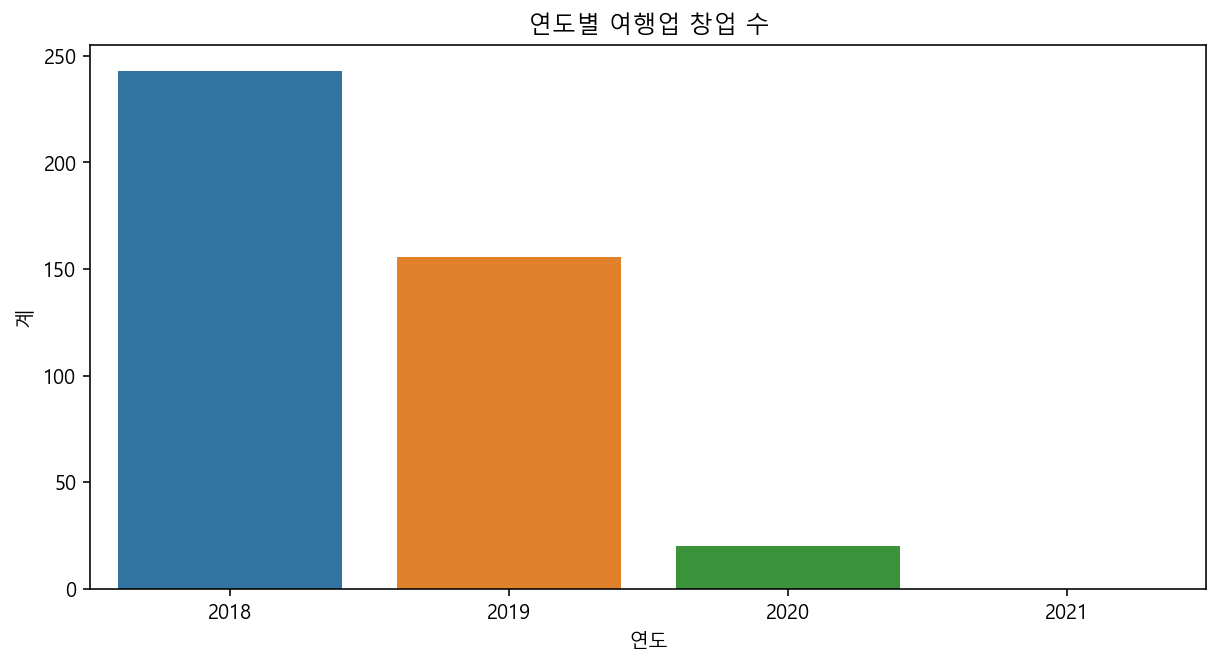

In [148]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 여행업 창업 수')
plt.savefig('data2/연도별_여행관련업체_창업수.jpg')

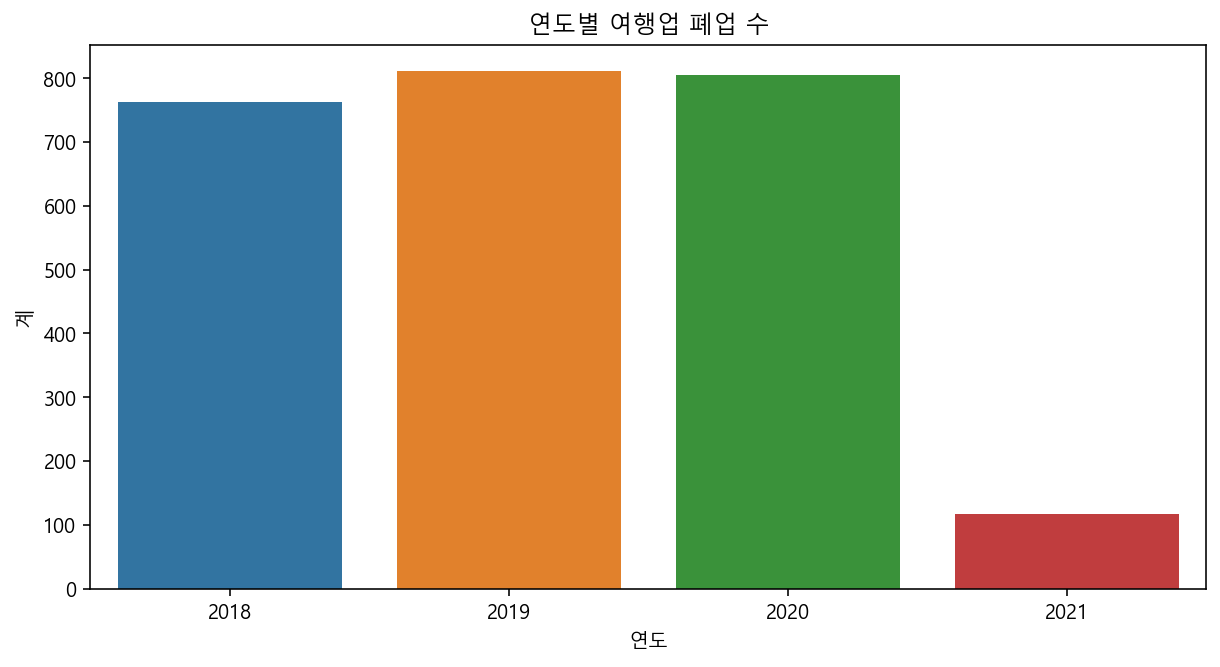

In [149]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 여행업 폐업 수')
plt.savefig('data2/연도별_여행관련업체_폐업수.jpg')

## 3) 노래방 창/폐업수

In [150]:
df = pd.read_csv('data/인허가/fulldata_03_09_01_P_노래연습장업.csv', encoding='CP949')
df = df.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [151]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

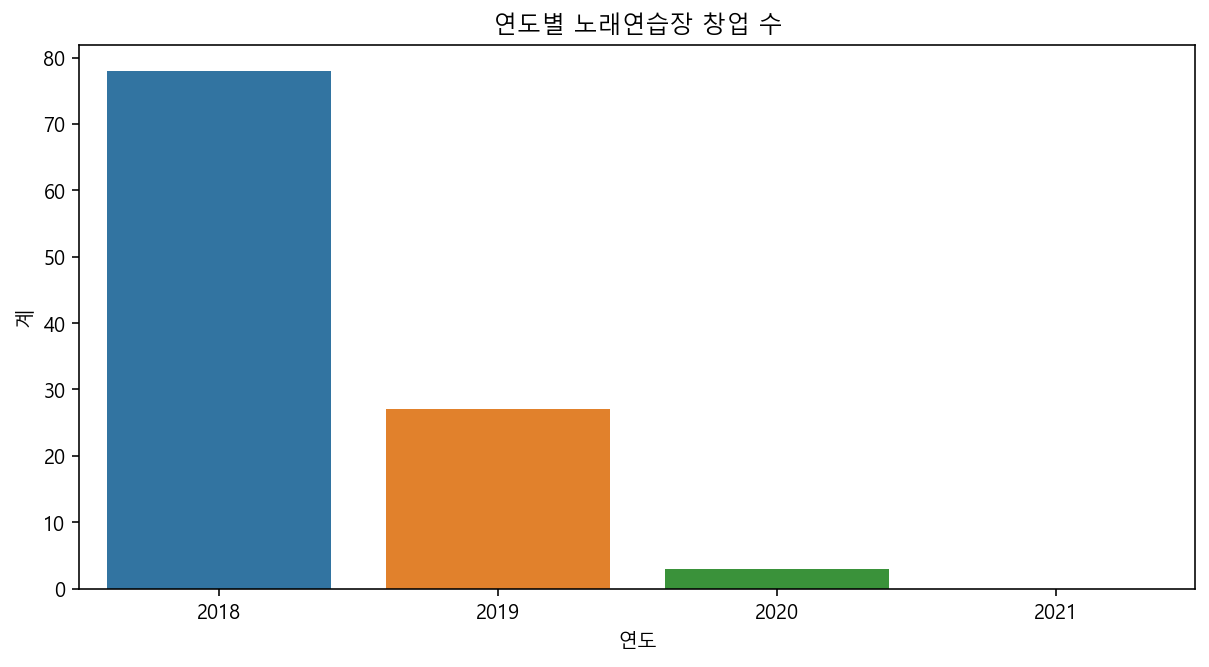

In [152]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 노래연습장 창업 수')
plt.savefig('data2/연도별_노래연습장_창업수.jpg')

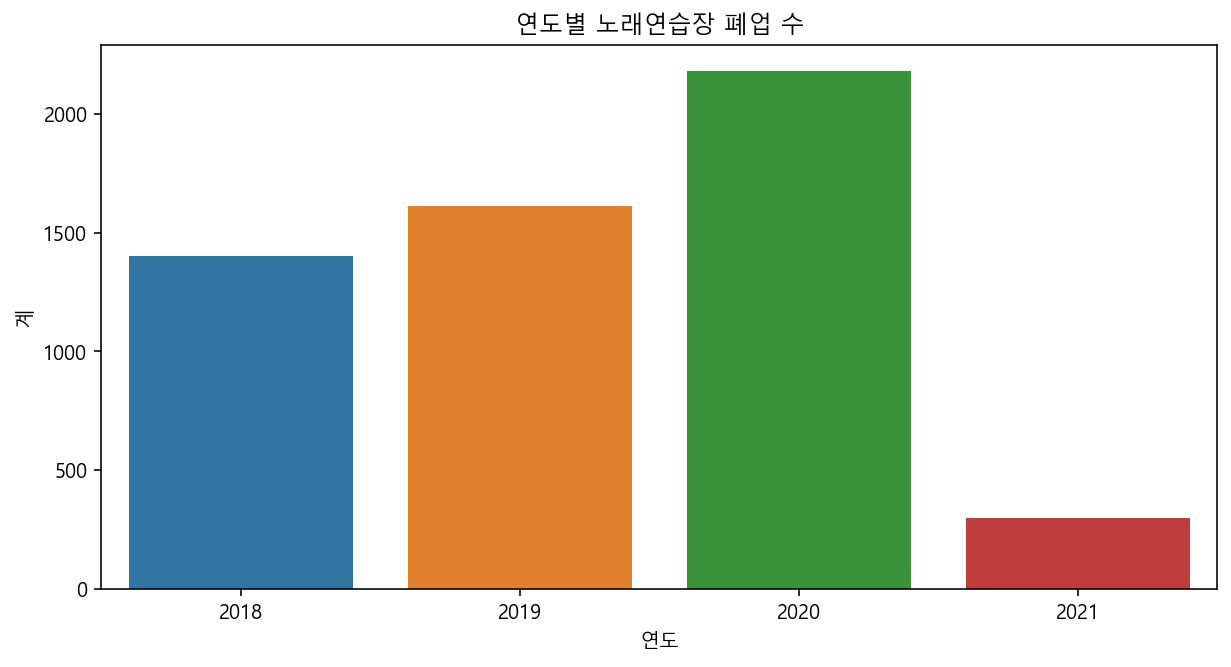

In [153]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 노래연습장 폐업 수')
plt.savefig('data2/연도별_노래연습장_폐업수.jpg')

## 4) 영화 창/폐업수
- 영화배급업, 영화상영관, 영화수입업, 영화제작업

In [154]:
df1 = pd.read_csv('data/인허가/fulldata_03_13_01_P_영화배급업.csv', encoding='cp949')
df1 = df1.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df2 = pd.read_csv('data/인허가/fulldata_03_13_02_P_영화상영관.csv', encoding='cp949')
df2 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df3 = pd.read_csv('data/인허가/fulldata_03_13_03_P_영화상영업.csv', encoding='cp949')
df3 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df4 = pd.read_csv('data/인허가/fulldata_03_13_04_P_영화수입업.csv', encoding='cp949')
df4 = df4.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df5 = pd.read_csv('data/인허가/fulldata_03_13_05_P_영화제작업.csv', encoding='cp949')
df5 = df5.loc[:,['개방서비스명', '인허가일자', '폐업일자']]

In [155]:
df = pd.concat([df1, df2, df3, df4, df5])
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

In [156]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

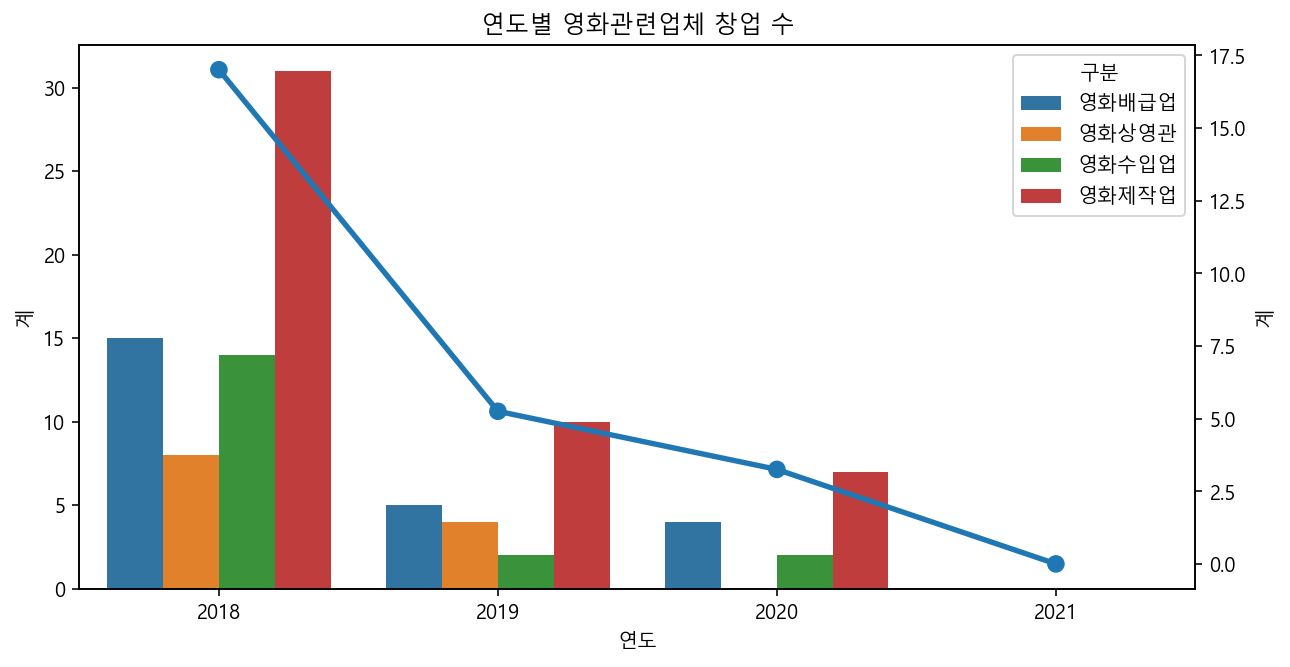

In [157]:
#ax.set_xticks([2018, 2019, 2020, 2021])
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연도', y='계', hue='구분', data=df_open, ax=ax1, ci=None)
ax2 = sns.pointplot(x='연도', y='계', data=df_open, ax=ax2, ci=None, alpha=0.5)
plt.title('연도별 영화관련업체 창업 수')
plt.savefig('data2/연도별_영화관련업체_구분별_창업추이.jpg')

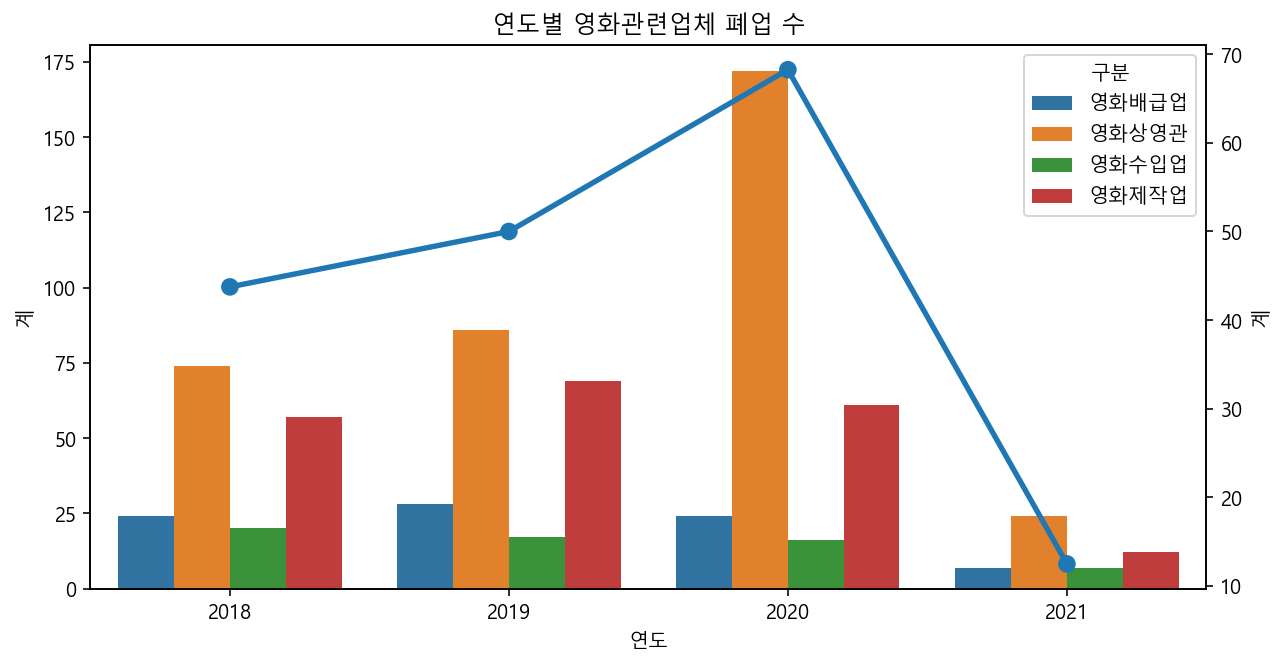

In [158]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연도', y='계', hue='구분', data=df_close, ax=ax1, ci=None)
ax2 = sns.pointplot(x='연도', y='계', data=df_close, ax=ax2, ci=None, alpha=0.5)
#ax.set_xticks([2018, 2019, 2020, 2021])
plt.title('연도별 영화관련업체 폐업 수')
plt.savefig('data2/연도별_영화관련업체_구분별_폐업추이.jpg')

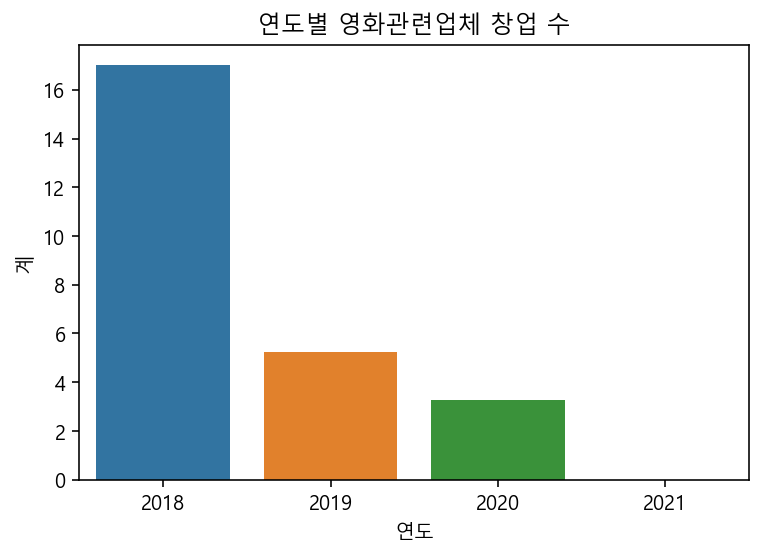

In [159]:
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 영화관련업체 창업 수')
plt.savefig('data2/연도별_영화관련업체_창업수.jpg')

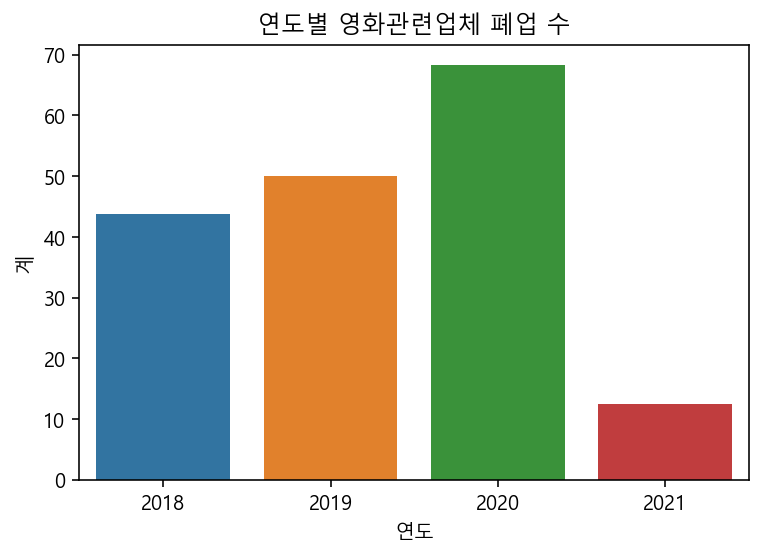

In [160]:
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 영화관련업체 폐업 수')
plt.savefig('data2/연도별_영화관련업체_폐업수.jpg')

## 5) 기간별 업종 폐업 분석 데이터
- https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=NES00017

In [4]:
df1 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200131103400.csv', header=None)
df2 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200531103400.csv', header=None)
df3 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200229103400.csv', header=None)

df4 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200331103400.csv', header=None)
df5 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200430103400.csv', header=None)
df6 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200630103400.csv', header=None)

df7 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200731103400.csv', header=None)
df8 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200831103400.csv', header=None)
df9 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200930103400.csv', header=None)

df10 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20201031103400.csv', header=None)
df11 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20201130103400.csv', header=None)
df12 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20201231103400.csv', header=None)

In [5]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [6]:
temp = df.iloc[:, [0, 1]]
temp.columns = ['연월', '구분']
temp

,연월,구분
0,20200102,산후조리원
1,20200102,소프트웨어개발(기타)
2,20200102,스파게티
3,20200102,정치단체
4,20200102,철물.건설자재소매(종합)
...,...,...
35195,20201230,휴대폰
35196,20201230,휴대폰
35197,20201230,휴대폰
35198,20201230,휴대폰


In [7]:
temp['연월'] = temp['연월'].apply(lambda x:str(x)[2:4]+'.'+str(x)[4:6])
temp

<ipython-input-7-14096f12b78d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['연월'] = temp['연월'].apply(lambda x:str(x)[2:4]+'.'+str(x)[4:6])


,연월,구분
0,20.01,산후조리원
1,20.01,소프트웨어개발(기타)
2,20.01,스파게티
3,20.01,정치단체
4,20.01,철물.건설자재소매(종합)
...,...,...
35195,20.12,휴대폰
35196,20.12,휴대폰
35197,20.12,휴대폰
35198,20.12,휴대폰


In [8]:
# 트리맵 그리기: https://m.blog.naver.com/kiddwannabe/222035613487
# pip install squarify
import squarify

In [9]:
len(set(temp['구분']))

3524

In [10]:
temp2 = temp.groupby(['구분']).count()
temp2.reset_index(inplace=True)
temp2 = temp2.sort_values(by='연월', ascending=False).head(30)

In [11]:
temp2

,구분,연월
3337,한식,13917
1203,부동산,7980
2964,치킨,3514
1025,미용실,2576
2989,카페,2411
159,건설업(종합),2171
2279,이삿짐센터,2092
383,교회,1991
2748,중국음식,1858
1931,여행사,1820


<AxesSubplot:>

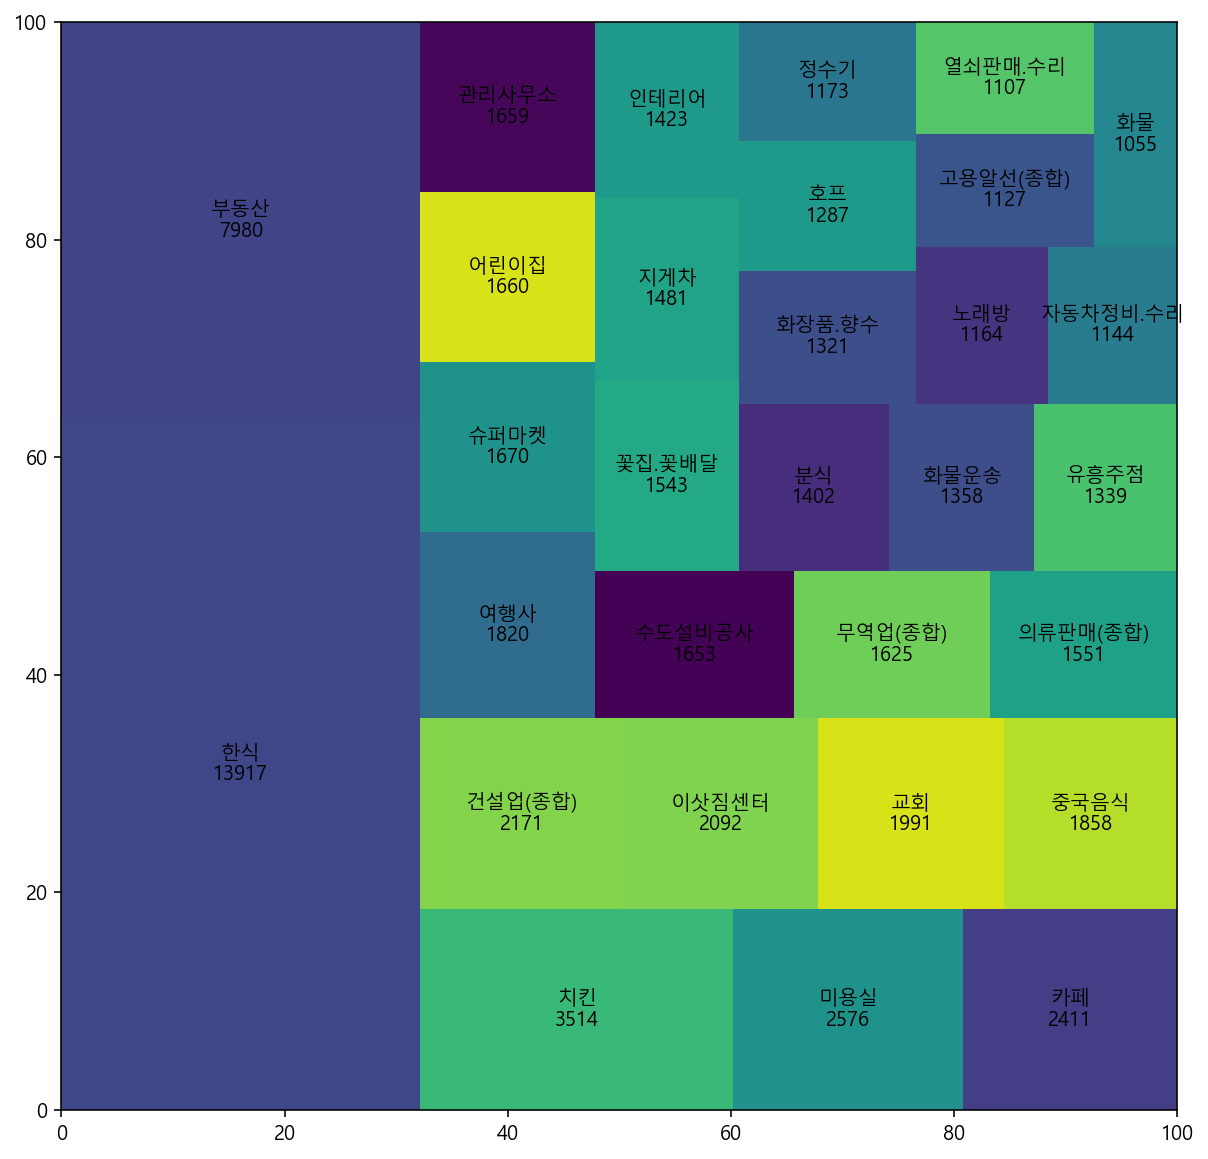

In [12]:
plt.figure(figsize=(10,10))
squarify.plot(sizes=temp2['연월'], label = temp2['구분'],
             value=temp2['연월'])

<AxesSubplot:>

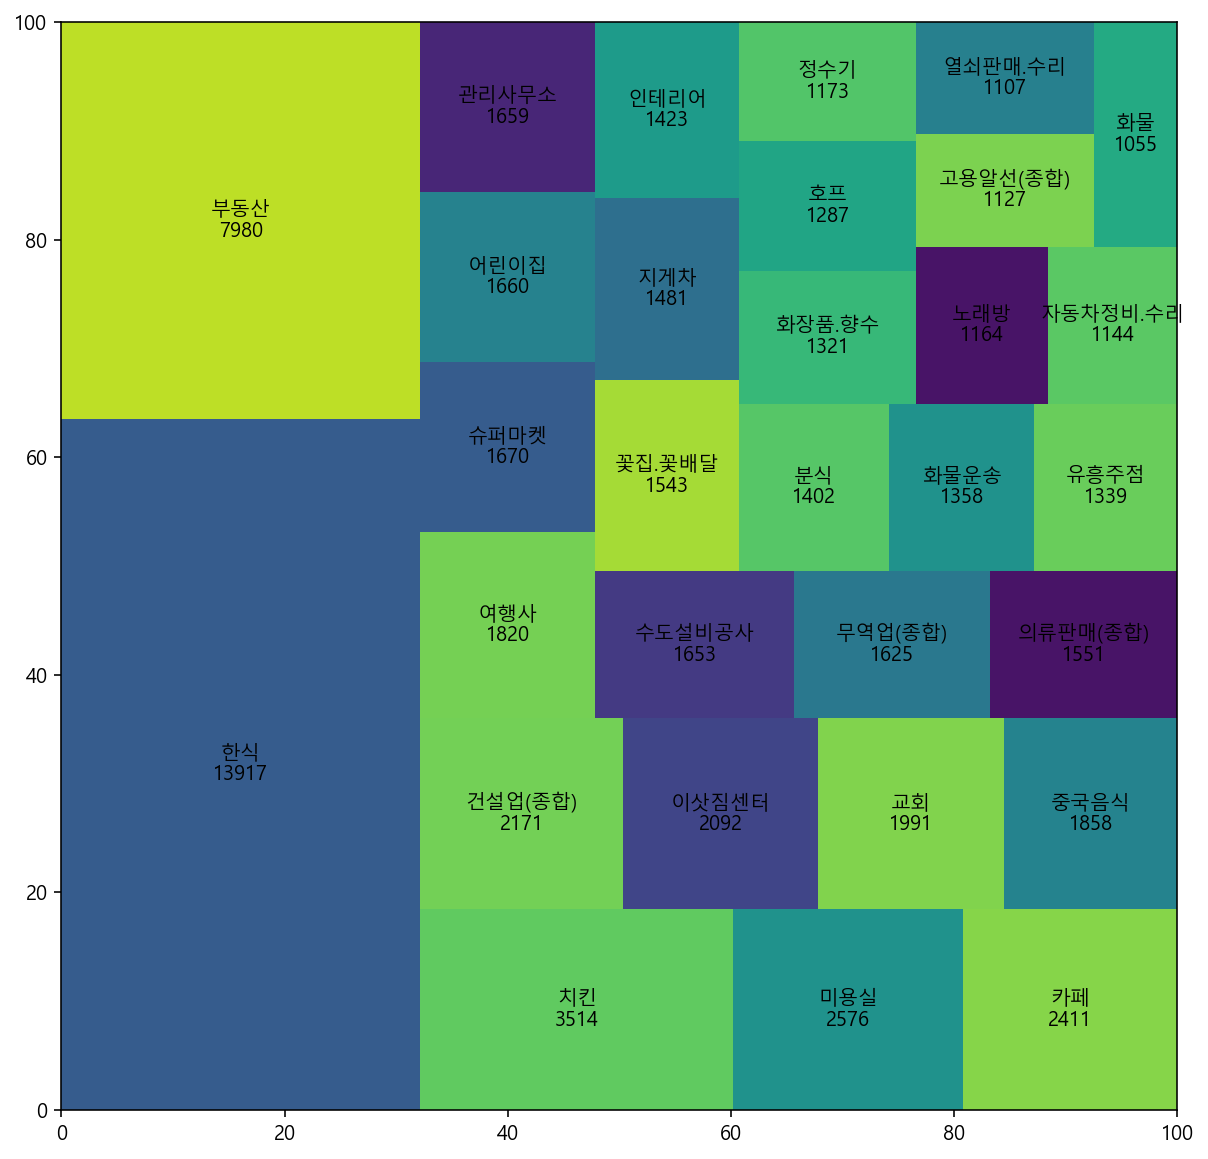

In [18]:
import matplotlib
minimum = temp2['연월'].min()
maximum = temp2['연월'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)

plt.figure(figsize=(10,10))
squarify.plot(sizes=temp2['연월'], label = temp2['구분'], value=temp2['연월'])

## 6) 사업자현황
- https://stats.nts.go.kr/data/data.asp

In [66]:
df1 = pd.read_excel('data/사업자 현황(2020년 07월 100대 생활업종).xlsx', header=None)
df2 = df1.iloc[6:108, 2:4]
df2.reset_index(drop=True, inplace=True)
df2 = df2[2:]
df2.columns = ['업종', '20.07']
df2

,업종,20.07
2,가구점,7561
3,가전제품수리점,16832
4,가전제품판매점,10174
5,간이주점,13271
6,간판광고물업,13041
...,...,...
97,호프전문점,31176
98,화장품가게,35024
99,휴대폰가게,18584
100,LPG 충전소,1610


In [67]:
df3 = pd.read_excel('data/국세청 사업자현황 (2019년7월 100대 생활업종)(0).xlsx', header=None)
df4 = df3.iloc[6:108, 2:4]
df4.reset_index(drop=True, inplace=True)
header = df4.iloc[0]
df4 = df4[2:]
df4.columns = ['업종', '19.07']
df4

,업종,19.07
2,가구점,7489
3,가전제품수리점,15164
4,가전제품판매점,10082
5,간이주점,15089
6,간판광고물업,12974
...,...,...
97,호프전문점,34026
98,화장품가게,35153
99,휴대폰가게,17994
100,LPG충전소,1639


In [68]:
df5 = pd.read_excel('data/사업자 현황 (2019년1월 100개업종).xlsx', header=None)
df6 = df5.iloc[6:108, 2:4]
df6.reset_index(drop=True, inplace=True)
header = df6.iloc[0]
df6 = df6[2:]
df6.columns = ['업종', '19.01']
df6

,업종,19.01
2,가구점,7450
3,가전제품수리점,13299
4,가전제품판매점,9817
5,간이주점,15649
6,간판광고물업,12897
...,...,...
97,호프전문점,34777
98,화장품가게,34962
99,휴대폰가게,17954
100,LPG충전소,1605


In [69]:
df7 = pd.read_excel('data/2020년1월사업자 현황(월별 100개업종).xlsx', header=None)
df8 = df7.iloc[6:108, 2:4]
df8.reset_index(drop=True, inplace=True)
header = df8.iloc[0]
df8 = df8[2:]
df8.columns = ['업종', '20.01']
df8

,업종,20.01
2,가구점,7485
3,가전제품수리점,15676
4,가전제품판매점,10022
5,간이주점,14308
6,간판광고물업,12991
...,...,...
97,호프전문점,32799
98,화장품가게,34935
99,휴대폰가게,18193
100,LPG 충전소,1613


In [70]:
df9 = pd.read_excel('data/사업자 현황(2021년 01월  100대 생활업종).xlsx', header=None)
df10 = df9.iloc[6:108, 2:4]
df10.reset_index(drop=True, inplace=True)
header = df10.iloc[0]
df10 = df10[2:]
df10.columns = ['업종', '21.01']
df10

,업종,21.01
2,가구점,7702
3,가전제품수리점,17139
4,가전제품판매점,10252
5,간이주점,12124
6,간판광고물업,13028
...,...,...
97,호프전문점,28835
98,화장품가게,35196
99,휴대폰가게,18850
100,LPG 충전소,1615


In [94]:
df = pd.merge(df6, df4, on='업종', how='outer')

In [95]:
df

,업종,19.01,19.07
0,가구점,7450,7489
1,가전제품수리점,13299,15164
2,가전제품판매점,9817,10082
3,간이주점,15649,15089
4,간판광고물업,12897,12974
...,...,...,...
95,호프전문점,34777,34026
96,화장품가게,34962,35153
97,휴대폰가게,17954,17994
98,LPG충전소,1605,1639


In [93]:
df_ =pd.merge(df8, df2, on='업종', how='outer')
df_ =pd.merge(df_, df10, on='업종', how='outer')
df_

,업종,20.01,20.07,21.01
0,가구점,7485,7561,7702
1,가전제품수리점,15676,16832,17139
2,가전제품판매점,10022,10174,10252
3,간이주점,14308,13271,12124
4,간판광고물업,12991,13041,13028
...,...,...,...,...
95,호프전문점,32799,31176,28835
96,화장품가게,34935,35024,35196
97,휴대폰가게,18193,18584,18850
98,LPG 충전소,1613,1610,1615


In [100]:
df_.iloc[98, 0] = 'LPG충전소'
df.iloc[14,0] = '교습소･공부방'

In [101]:
df = pd.merge(df, df_, on='업종', how='outer')
df

,업종,19.01,19.07,20.01,20.07,21.01
0,가구점,7450,7489,7485,7561,7702
1,가전제품수리점,13299,15164,15676,16832,17139
2,가전제품판매점,9817,10082,10022,10174,10252
3,간이주점,15649,15089,14308,13271,12124
4,간판광고물업,12897,12974,12991,13041,13028
...,...,...,...,...,...,...
95,호프전문점,34777,34026,32799,31176,28835
96,화장품가게,34962,35153,34935,35024,35196
97,휴대폰가게,17954,17994,18193,18584,18850
98,LPG충전소,1605,1639,1613,1610,1615


In [103]:
df['19.01'] = pd.to_numeric(df['19.01'])
df['19.07'] = pd.to_numeric(df['19.07'])
df['20.01'] = pd.to_numeric(df['20.01'])
df['20.07'] = pd.to_numeric(df['20.07'])
df['21.01'] = pd.to_numeric(df['21.01'])

In [104]:
df['증감1'] = df['19.07']-df['19.01']
df['증감2'] = df['20.01']-df['19.07']
df['증감3'] = df['20.07']-df['20.01']
df['증감4'] = df['21.01']-df['20.07']
df['1월(20-19)'] = df['20.01']-df['19.01']
df['1월(21-20)'] = df['21.01']-df['20.01']
df

,업종,19.01,19.07,20.01,20.07,21.01,증감1,증감2,증감3,증감4,1월(20-19),1월(21-20)
0,가구점,7450,7489,7485,7561,7702,39,-4,76,141,35,217
1,가전제품수리점,13299,15164,15676,16832,17139,1865,512,1156,307,2377,1463
2,가전제품판매점,9817,10082,10022,10174,10252,265,-60,152,78,205,230
3,간이주점,15649,15089,14308,13271,12124,-560,-781,-1037,-1147,-1341,-2184
4,간판광고물업,12897,12974,12991,13041,13028,77,17,50,-13,94,37
...,...,...,...,...,...,...,...,...,...,...,...,...
95,호프전문점,34777,34026,32799,31176,28835,-751,-1227,-1623,-2341,-1978,-3964
96,화장품가게,34962,35153,34935,35024,35196,191,-218,89,172,-27,261
97,휴대폰가게,17954,17994,18193,18584,18850,40,199,391,266,239,657
98,LPG충전소,1605,1639,1613,1610,1615,34,-26,-3,5,8,2


In [162]:
open_top

,업종,19.01,19.07,20.01,20.07,21.01,증감1,증감2,증감3,증감4,1월(20-19),1월(21-20)
31,미용실,98822,100664,102117,103697,105058,1842,1453,1580,1361,3295,2941
89,편의점,39366,41052,41978,43722,45219,1686,926,1744,1497,2612,3241
87,패스트푸드점,36388,37821,39210,41260,43368,1433,1389,2050,2108,2822,4158
90,피부관리업,33073,36171,38312,40585,42540,3098,2141,2273,1955,5239,4228
14,교습소･공부방,30403,32320,34286,37868,40135,1917,1966,3582,2267,3883,5849
53,실내장식가게,52386,55087,57280,60171,63522,2701,2193,2891,3351,4894,6242
35,부동산중개업,122294,124508,126227,130010,133747,2214,1719,3783,3737,3933,7520
84,커피음료점,52374,58282,62278,67748,71906,5908,3996,5470,4158,9904,9628
93,한식전문점,378724,383595,387067,392857,398738,4871,3472,5790,5881,8343,11671
86,통신판매업,223126,247454,275378,316004,367830,24328,27924,40626,51826,52252,92452


In [125]:
close_top = df.sort_values(by='1월(21-20)').head(10)
open_top = df.sort_values(by='1월(21-20)').tail(10)

<AxesSubplot:xlabel='업종', ylabel='1월(21-20)'>

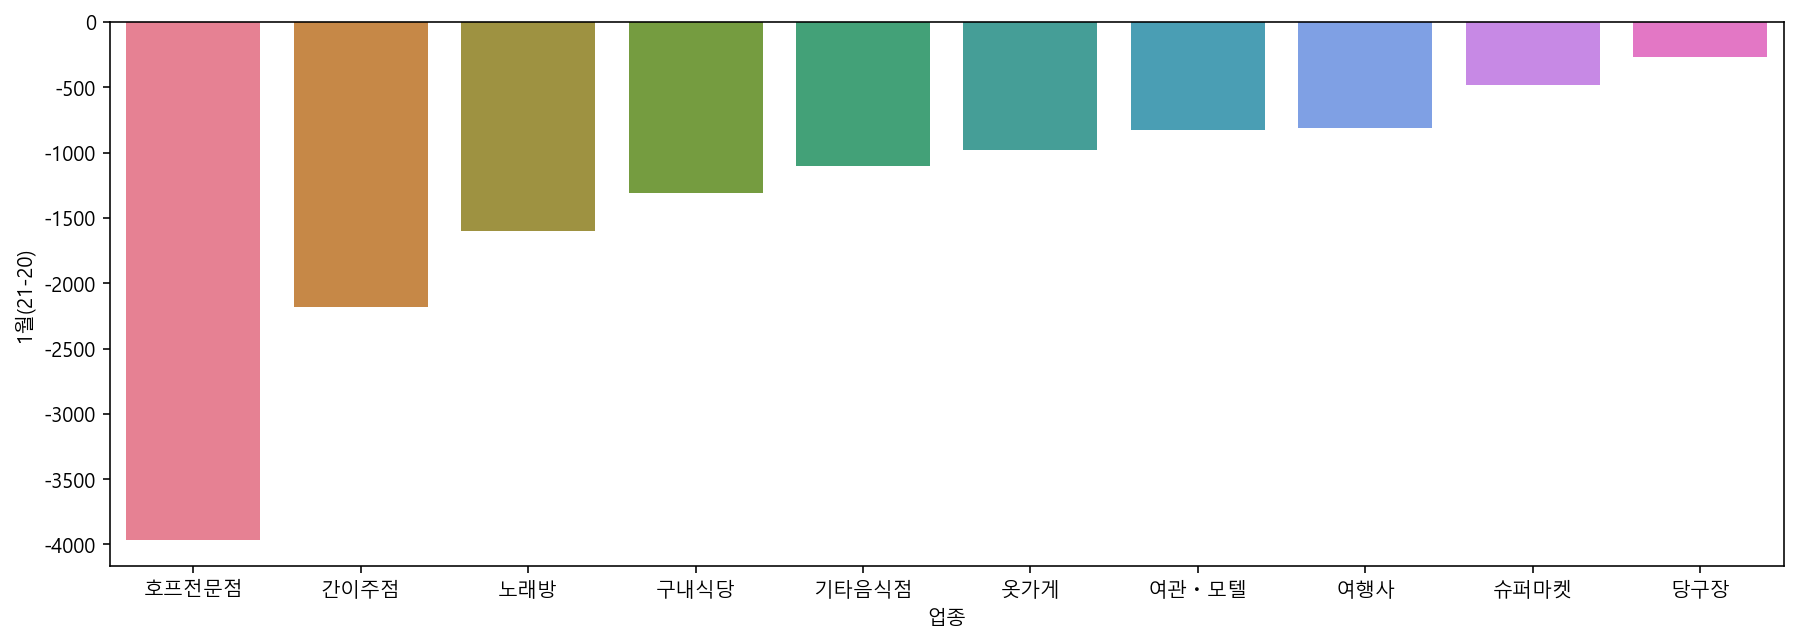

In [134]:
plt.figure(figsize=(15,5))
sns.barplot(x='업종', y='1월(21-20)', data=close_top, palette='husl')

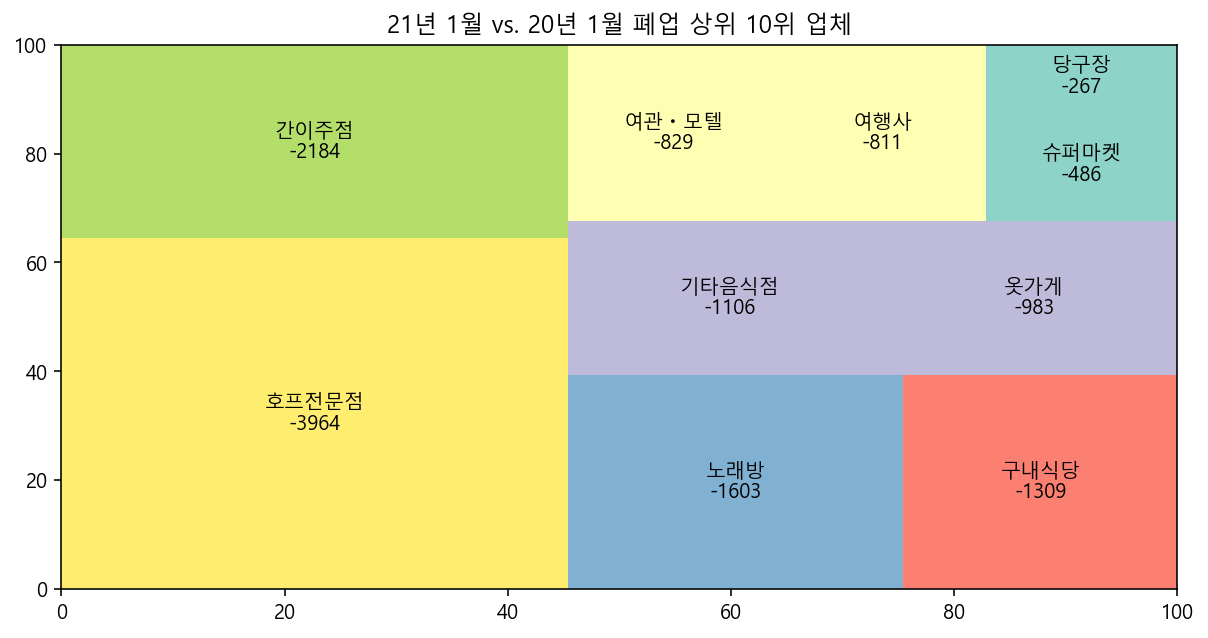

In [160]:
plt.figure(figsize=(10,5))
minimum = abs(close_top['1월(21-20)']).min()
maximum = abs(close_top['1월(21-20)']).max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)
cmap = matplotlib.cm.Set3
color_list = [cmap(norm(value)) for value in abs(close_top['1월(21-20)'])]
squarify.plot(sizes=abs(close_top['1월(21-20)']), label = close_top['업종'],
             value=close_top['1월(21-20)'], color=color_list)
plt.title('21년 1월 vs. 20년 1월 폐업 상위 10위 업체')
plt.savefig('data2/21년1월_폐업상위10위.jpg')

C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65381 missing from current font.
  font.set_text(s, 0, flags=flags)


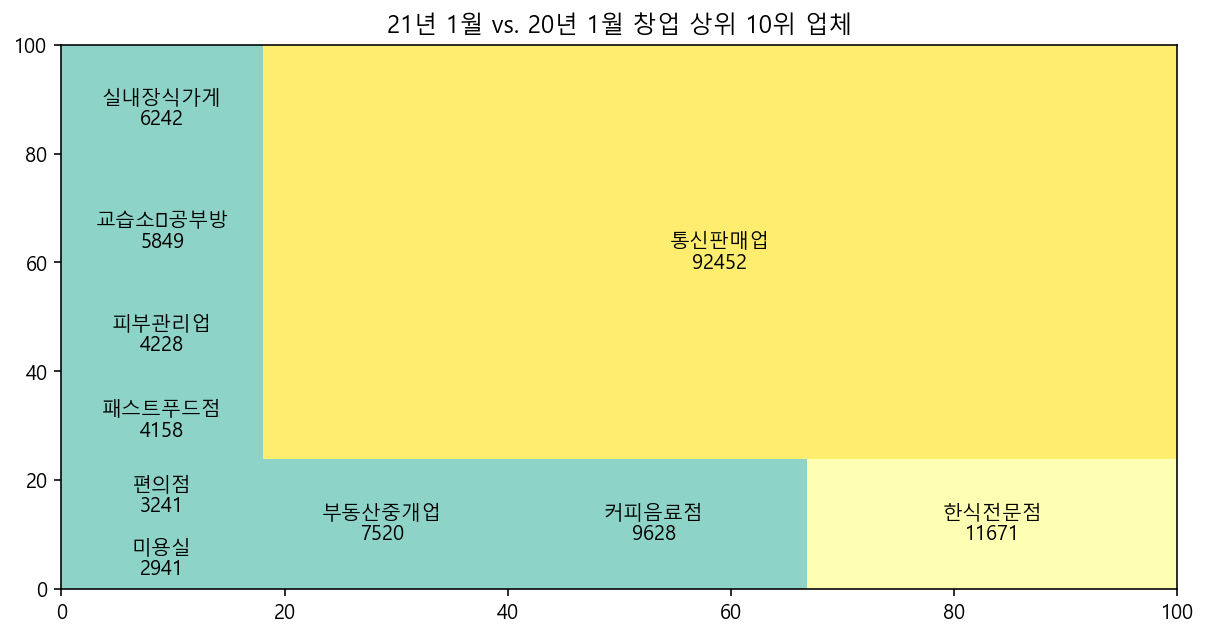

In [161]:
plt.figure(figsize=(10,5))
minimum = open_top['1월(21-20)'].min()
maximum = open_top['1월(21-20)'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)
cmap = matplotlib.cm.Set3
color_list = [cmap(norm(value)) for value in open_top['1월(21-20)']]
squarify.plot(sizes=open_top['1월(21-20)'], label = open_top['업종'],
             value=open_top['1월(21-20)'], color=color_list)
plt.title('21년 1월 vs. 20년 1월 창업 상위 10위 업체')
plt.savefig('data2/21년1월_창업상위10위.jpg')

<AxesSubplot:xlabel='업종', ylabel='1월(21-20)'>

C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65381 missing from current font.
  font.set_text(s, 0, flags=flags)


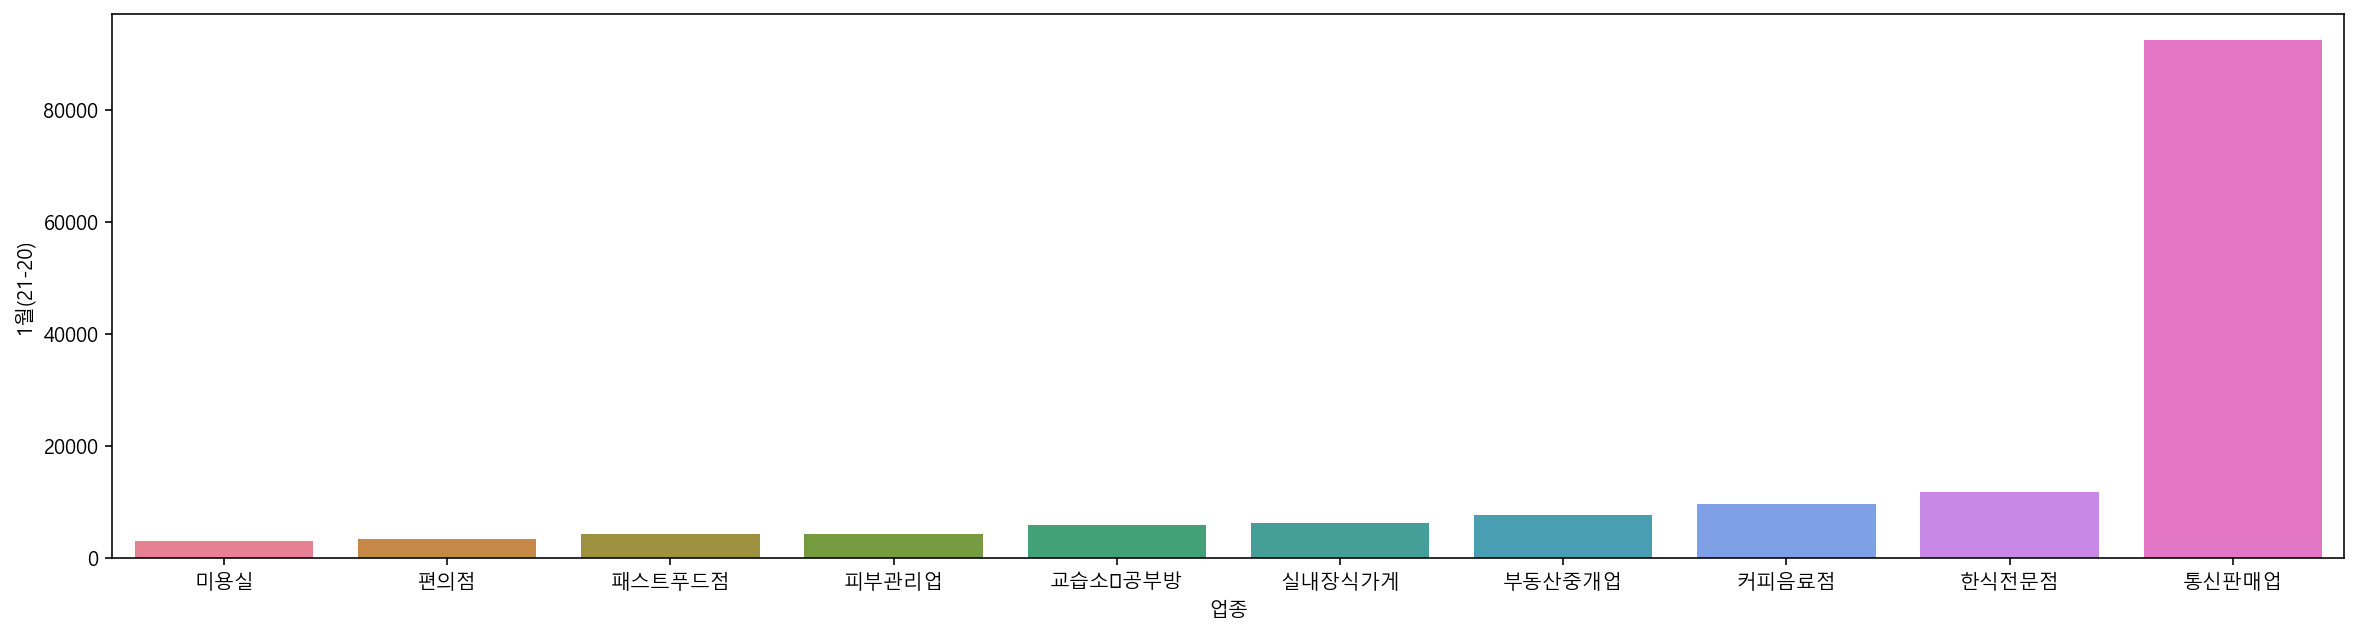

In [135]:
plt.figure(figsize=(20,5))
sns.barplot(x='업종', y='1월(21-20)', data=open_top, palette='husl')

In [118]:
open_top[open_top['업종']!='통신판매업']

,업종,19.01,19.07,20.01,20.07,21.01,증감1,증감2,증감3,증감4,1월(20-19),1월(21-20)
45,스포츠교육기관,23362,24301,25151,25821,26455,939,850,670,634,1789,1304
1,가전제품수리점,13299,15164,15676,16832,17139,1865,512,1156,307,2377,1463
20,기타외국식전문점,22738,23486,23870,24315,25456,748,384,445,1141,1132,1586
17,기술및직업훈련학원,12320,13059,14058,14869,15895,739,999,811,1026,1738,1837
88,펜션ㆍ게스트하우스,11260,12933,13814,15475,16485,1673,881,1661,1010,2554,2671
31,미용실,98822,100664,102117,103697,105058,1842,1453,1580,1361,3295,2941
89,편의점,39366,41052,41978,43722,45219,1686,926,1744,1497,2612,3241
87,패스트푸드점,36388,37821,39210,41260,43368,1433,1389,2050,2108,2822,4158
90,피부관리업,33073,36171,38312,40585,42540,3098,2141,2273,1955,5239,4228
14,교습소･공부방,30403,32320,34286,37868,40135,1917,1966,3582,2267,3883,5849
